In [1]:
import os
import json
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
directory = "Predictions"

In [3]:
predictions = {}

In [4]:
for root, dirs, files in os.walk(directory):
    for file in files:
        # Check if the file is a JSON file
        if file.endswith(".json"):
            # Get the file path
            file_path = os.path.join(root, file)

            # Read the list from JSON file
            with open(file_path, 'r') as f:
                json_data = json.load(f)

            # Convert the list to a NumPy array
            np_array = np.array(json_data)

            # Get the file name without the extension
            file_name = os.path.splitext(file)[0]

            # Add the NumPy array to the predictions dictionary
            predictions[file_name] = np_array

In [5]:
SoFA_fpr, SoFA_tpr, SoFA_threshold = roc_curve(predictions['true'], predictions['SoFA'])
auc_SoFA = auc(SoFA_fpr, SoFA_tpr)

In [6]:
SoFA_mo_fpr, SoFA_mo_tpr, SoFA_mo_threshold = roc_curve(predictions['true'], predictions['SoFA_mo'])
auc_SoFA_mo = auc(SoFA_mo_fpr, SoFA_mo_tpr)

In [7]:
Adam_fpr, Adam_tpr, Adam_threshold = roc_curve(predictions['true'], predictions['Adam'])
auc_Adam = auc(Adam_fpr, Adam_tpr)

In [8]:
SGD_fpr, SGD_tpr, SGD_threshold = roc_curve(predictions['true'], predictions['SGD'])
auc_SGD = auc(SGD_fpr, SGD_tpr)

In [9]:
RMSprop_fpr, RMSprop_tpr, RMSprop_threshold = roc_curve(predictions['true'], predictions['RMSprop'])
auc_RMSprop = auc(RMSprop_fpr, RMSprop_tpr)

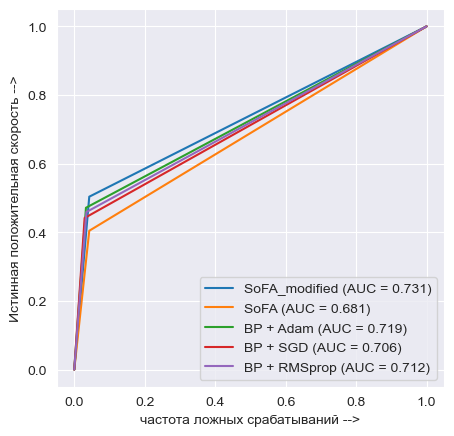

In [36]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(SoFA_fpr, SoFA_tpr, linestyle='-', label='SoFA_modified (AUC = %0.3f)' % auc_SoFA)
plt.plot(SoFA_mo_fpr, SoFA_mo_tpr, linestyle='-', label='SoFA (AUC = %0.3f)' % auc_SoFA_mo)
plt.plot(Adam_fpr, Adam_tpr, linestyle='-', label='BP + Adam (AUC = %0.3f)' % auc_Adam)
plt.plot(SGD_fpr, SGD_tpr, linestyle='-', label='BP + SGD (AUC = %0.3f)' % auc_SGD)
plt.plot(RMSprop_fpr, RMSprop_tpr, linestyle='-', label='BP + RMSprop (AUC = %0.3f)' % auc_RMSprop)

plt.xlabel('частота ложных срабатываний -->')
plt.ylabel('Истинная положительная скорость -->')

plt.legend()

plt.show()

In [10]:
labels = ['Не вышел', 'Вышел']

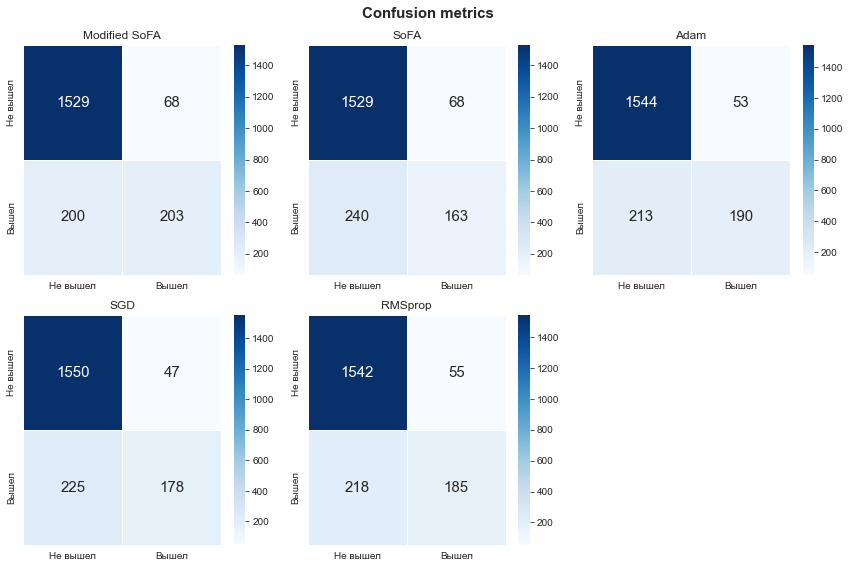

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

con_1 = confusion_matrix(predictions['true'], predictions['SoFA'])
sns.heatmap(con_1, annot=True, ax =axes[0][0],annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="Blues", xticklabels=labels,
            yticklabels=labels)
axes[0][0].set_title("Modified SoFA")

con_2 = confusion_matrix(predictions['true'], predictions['SoFA_mo'])
sns.heatmap(con_2, annot=True, ax =axes[0][1],annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="Blues", xticklabels=labels,
            yticklabels=labels)
axes[0][1].set_title("SoFA")

con_3 = confusion_matrix(predictions['true'], predictions['Adam'])
sns.heatmap(con_3, annot=True, ax =axes[0][2],annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="Blues", xticklabels=labels,
            yticklabels=labels)
axes[0][2].set_title("Adam")

con_4 = confusion_matrix(predictions['true'], predictions['SGD'])
sns.heatmap(con_4, annot=True, ax =axes[1][0],annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="Blues", xticklabels=labels,
            yticklabels=labels)
axes[1][0].set_title("SGD")

con_5 = confusion_matrix(predictions['true'], predictions['RMSprop'])
sns.heatmap(con_5, annot=True, ax =axes[1][1],annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="Blues", xticklabels=labels,
            yticklabels=labels)
axes[1][1].set_title("RMSprop")

axes[1][2].axis('off')

plt.suptitle('Confusion metrics', fontweight='bold', fontsize=15)
plt.tight_layout()
plt.show()

In [2]:
histories = {}

In [3]:
directory_ = "Histories"

In [4]:
for root, dirs, files in os.walk(directory_):
    for file in files:
        # Check if the file is a JSON file
        if file.endswith(".json"):
            # Get the file path
            file_path = os.path.join(root, file)

            # Read the list from JSON file
            with open(file_path, 'r') as f:
                json_data = json.load(f)

            # Convert the list to a NumPy array
            np_array = np.array(json_data)

            # Get the file name without the extension
            file_name = os.path.splitext(file)[0]

            # Add the NumPy array to the predictions dictionary
            histories[file_name] = np_array

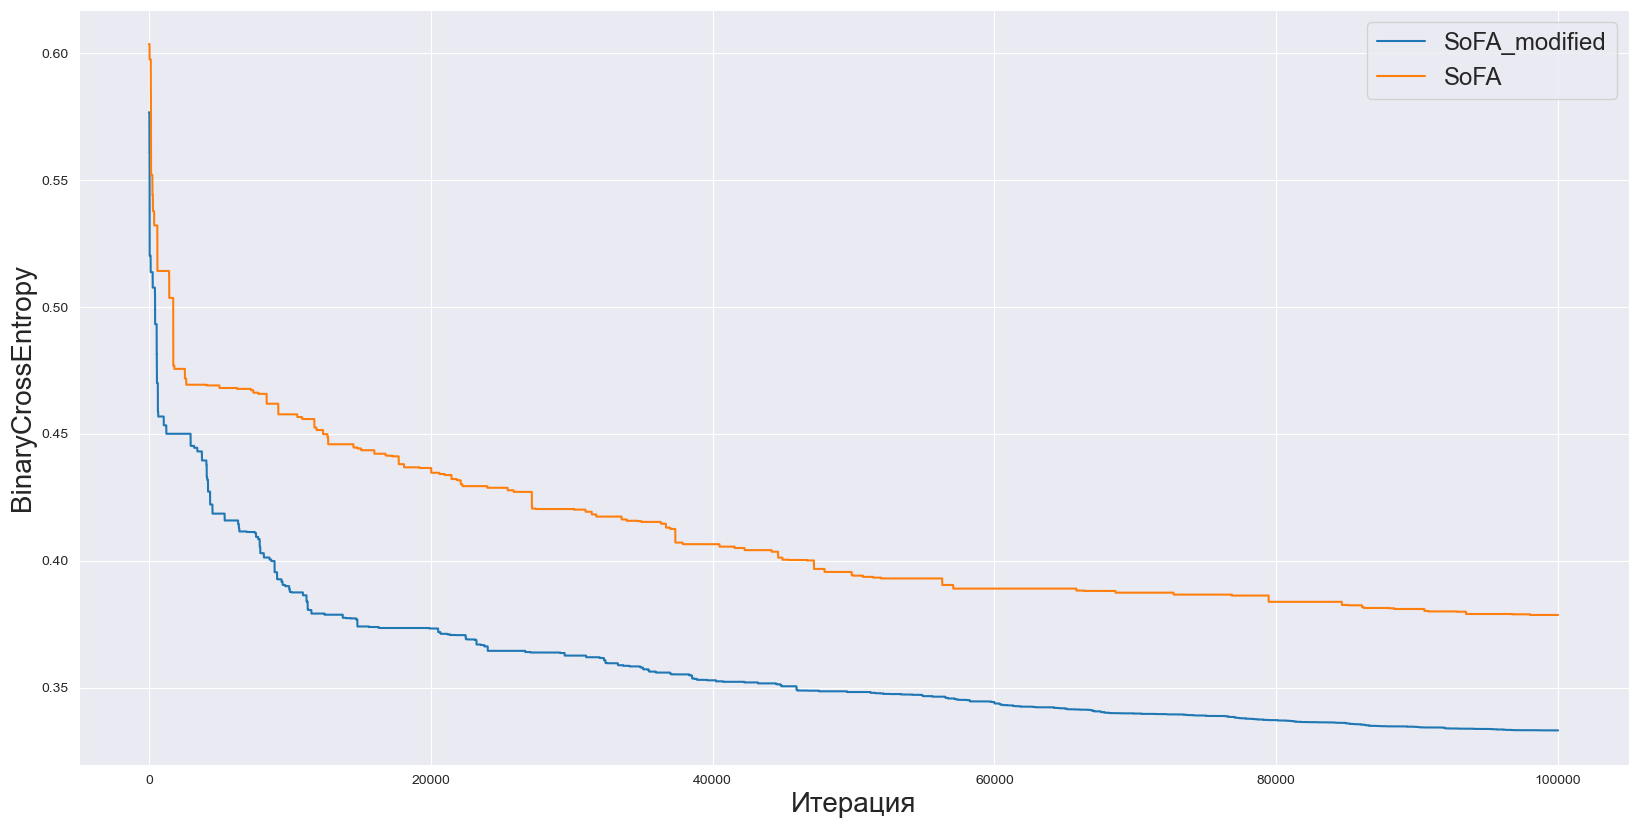

In [5]:
plt.figure(figsize=(20, 10), dpi=100)

plt.plot(np.absolute(histories['SoFA']),linestyle='-', label='SoFA_modified')
plt.plot(np.absolute(histories['SoFA_mo']), linestyle='-', label='SoFA')

plt.xlabel('Итерация', fontsize=20)
plt.ylabel('BinaryCrossEntropy', fontsize=20)

legend = plt.legend(fontsize='xx-large')

# Increase the size of the legend

plt.show()